In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

In [2]:
data = np.load("labels_ann_9p_5k.npy")
data.shape

(5000, 9)

In [3]:
FROGS = np.load("FROG_9p_5k.npy")
FROGS.shape

(5000, 128, 128)

In [4]:
FROGS = FROGS.reshape(5000,-1)

In [5]:
a_max = np.max(FROGS)
b_min = np.min(FROGS)
X_orig = (FROGS - b_min)/(a_max - b_min)
X_train = X_orig[:4600, :]
X_val = X_orig[4600:, :]

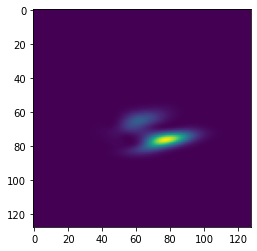

In [7]:
plt.imshow(FROGS[1000].reshape(128,128))

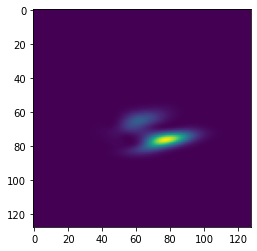

In [8]:
plt.imshow(X_orig[1000].reshape(128,128))

In [18]:
Y = np.zeros([5000,9])
Y[:,0] = (data[:,0] - 295)/(695-295)
Y[:,1] = (data[:,1] - 300)/(1000-300)
Y[:,2] = (data[:,2] - 0.6)/(1.5-0.6)
Y[:,3] = (data[:,3] - 0.6)/(1.5-0.6)
Y[:,4] = (data[:,4] + 4e-6)/(1e-6+4e-6)
Y[:,5] = (data[:,5] + 1.45e-9)/(1.5e-9+1.45e-9)
Y[:,6] = (data[:,6] + 0.005)/(0.005 + 0.005)
Y[:,7] = (data[:,7] + 0.0005)/(0.0005 + 0.0005)
Y[:,8] = (data[:,8] + 1000)/(5000+1000)

In [19]:
Y_train = Y[:4600]
Y_val = Y[4600:]

In [71]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.regularizers import l2

def create_model():
    model = Sequential()
    model.add(Dense(512, activation = "relu", input_shape = (16384,)))
    #model.add(BatchNormalization())
    model.add(Dense(64, activation = "relu"))
    #model.add(BatchNormalization())
    model.add(Dense(9, activation = "sigmoid"))
    return model

In [72]:
from keras.optimizers import Adam

model = create_model()
opt = Adam(learning_rate=0.03)
model.compile(optimizer = opt, loss = "mean_squared_error", metrics = ["accuracy", "mean_absolute_error"])

In [73]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               8389120   
_________________________________________________________________
dense_25 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_26 (Dense)             (None, 9)                 585       
Total params: 8,422,537
Trainable params: 8,422,537
Non-trainable params: 0
_________________________________________________________________


In [74]:
sol = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 64)

Train on 4600 samples, validate on 400 samples
Epoch 1/50
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0751 - accuracy: 0.2154 - mean_absolute_error: 0.2269 - val_loss: 0.0635 - val_accuracy: 0.2250 - val_mean_absolute_error: 0.2082
Epoch 2/50
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0624 - accuracy: 0.2646 - mean_absolute_error: 0.2031 - val_loss: 0.0584 - val_accuracy: 0.3075 - val_mean_absolute_error: 0.1934
Epoch 3/50
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0579 - accuracy: 0.2922 - mean_absolute_error: 0.1926 - val_loss: 0.0530 - val_accuracy: 0.3125 - val_mean_absolute_error: 0.1836
Epoch 4/50
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0561 - accuracy: 0.2937 - mean_absolute_error: 0.1884 - val_loss: 0.0531 - val_accuracy: 0.3175 - val_mean_absolute_error: 0.1831
Epoch 5/50
4600/4600 [==============================] - 13s 3ms/step - loss: 0.0558 - accuracy: 0.3020 - mean_absolut

4600/4600 [==============================] - 14s 3ms/step - loss: 0.0503 - accuracy: 0.3411 - mean_absolute_error: 0.1747 - val_loss: 0.0495 - val_accuracy: 0.3475 - val_mean_absolute_error: 0.1727ss: 0.0505 - ac
Epoch 40/50
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0498 - accuracy: 0.3400 - mean_absolute_error: 0.1736 - val_loss: 0.0502 - val_accuracy: 0.3250 - val_mean_absolute_error: 0.1736
Epoch 41/50
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0499 - accuracy: 0.3454 - mean_absolute_error: 0.1737 - val_loss: 0.0486 - val_accuracy: 0.3325 - val_mean_absolute_error: 0.1703
Epoch 42/50
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0502 - accuracy: 0.3404 - mean_absolute_error: 0.1746 - val_loss: 0.0474 - val_accuracy: 0.3225 - val_mean_absolute_error: 0.1681
Epoch 43/50
4600/4600 [==============================] - 14s 3ms/step - loss: 0.0499 - accuracy: 0.3439 - mean_absolute_error: 0.1736 - val_loss: 0.0486 - va

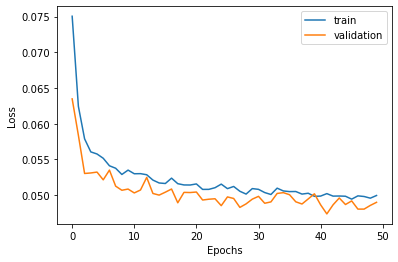

In [75]:
plt.plot(sol.history["loss"])
plt.plot(sol.history["val_loss"])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
#plt.xlim([20,40])
#plt.ylim([0,0.002])
plt.show()

In [64]:
model.predict(X_val[41].reshape(1,16384))

array([[0.5454471 , 0.36492103, 0.55898297, 0.33304244, 0.46821958,
        0.43727952, 0.8968299 , 0.33295596, 0.26420638]], dtype=float32)

In [65]:
Y_val[41]

array([0.1825    , 0.15142857, 0.77777778, 0.66666667, 0.528     ,
       0.20338983, 0.9       , 0.75      , 0.20833333])

In [66]:
model.save("ann-v3-5k-1000epochs")